# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from torch.autograd import Variable
import torch
import torchvision

## Carregamento dos dados do MNIST

In [2]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...


remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 8.36 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [4]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

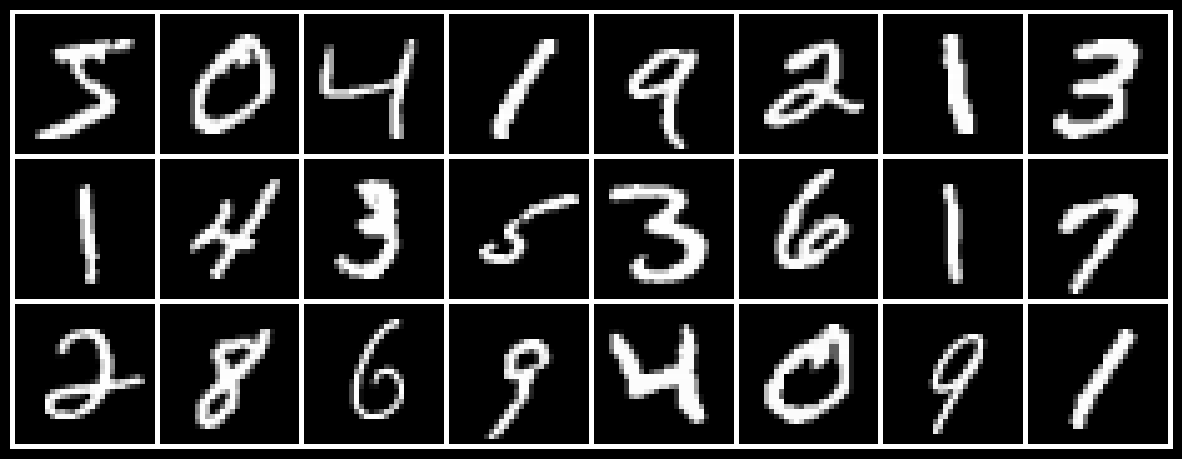

In [5]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


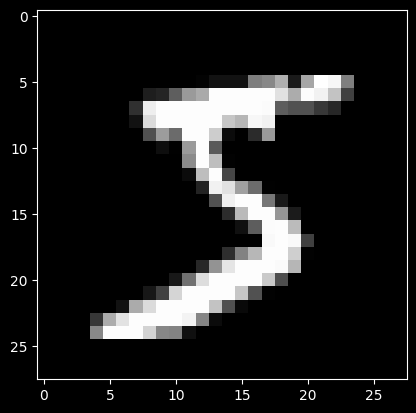

In [6]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy().reshape(28,28), cmap='gray')
print('class:', target)

## Modelo

In [7]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [8]:
## TODO

## Treinamento

### Inicialização dos parâmetros

In [9]:
epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [10]:
! pip install graphviz
! pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-6fuuoqgu
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-6fuuoqgu
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


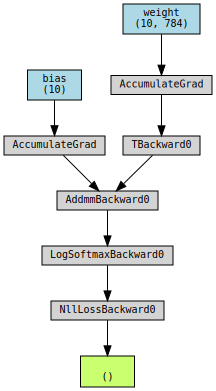

In [11]:
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
from torchviz import make_dot, make_dot_from_trace
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [12]:
from IPython import display
import numpy
a = 5
losses = []
zs = []
fig = plt.figure(figsize=(18, 6))

try:
    for i in range(epochs):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # Predict da rede
        outputs = model(inputs)
        zs.append(outputs[1].detach().numpy())

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data)
        _, predicts = torch.max(outputs, 1)

        y_pred = predicts.data
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()

except KeyboardInterrupt:
    pass

<Figure size 1800x600 with 0 Axes>

In [13]:
model.weight.grad

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [14]:
print('Final loss:', loss.data)

Final loss: tensor(1.0910)


### Visualizando gráfico de perda durante o treinamento

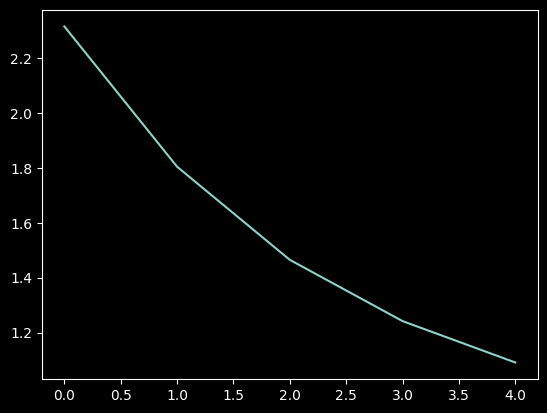

In [15]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [16]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.819


### Matriz de confusão com dados de treinamento e teste

In [17]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,93,0,3,1,0,5,2,2,0,2
1,0,110,10,1,3,2,2,6,7,3
2,2,0,77,2,1,5,4,1,4,1
3,0,1,0,79,0,13,0,0,7,1
4,0,0,2,0,88,6,3,1,0,6
5,0,1,0,1,0,52,0,0,3,2
6,2,1,1,1,3,3,81,0,1,1
7,0,1,4,4,1,1,0,104,0,11
8,0,2,1,2,0,2,2,0,62,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


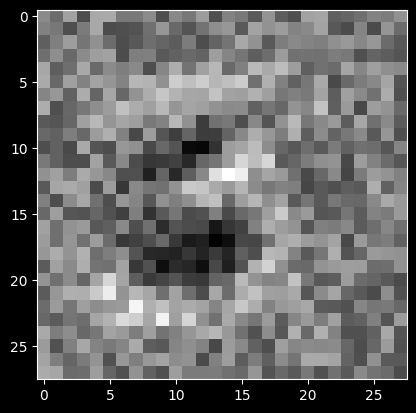

In [18]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

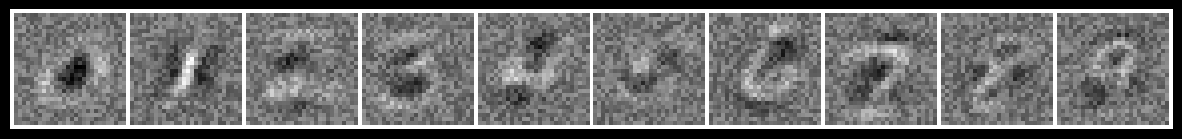

In [19]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

In [20]:
losses = []
zs = []

for epoch in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    zs.append(outputs[1].detach().numpy())

    # Calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # Zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data)
    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    # Imprime o número da época, a perda e a acurácia
    print(f"Época: {epoch + 1}, Perda: {loss.item():.4f}, Acurácia: {accuracy:.4f}")

Época: 1, Perda: 0.9826, Acurácia: 0.8190
Época: 2, Perda: 0.9023, Acurácia: 0.8320
Época: 3, Perda: 0.8400, Acurácia: 0.8450
Época: 4, Perda: 0.7902, Acurácia: 0.8500
Época: 5, Perda: 0.7492, Acurácia: 0.8580


- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

Época: 1, Perda: 0.7147, Acurácia: 0.8620


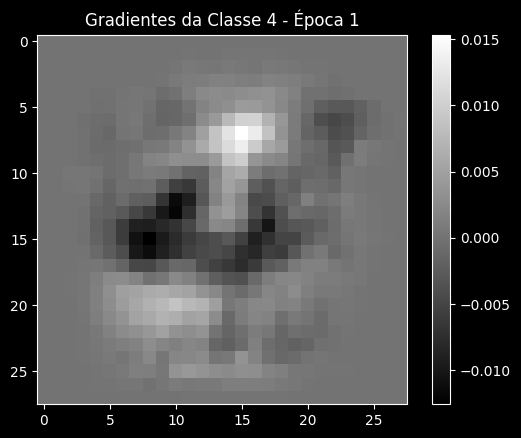

Época: 2, Perda: 0.6852, Acurácia: 0.8660


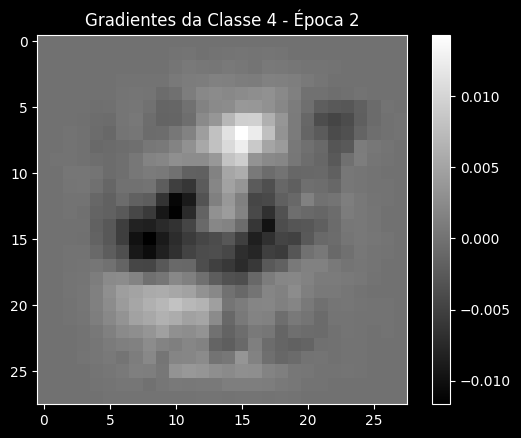

Época: 3, Perda: 0.6594, Acurácia: 0.8700


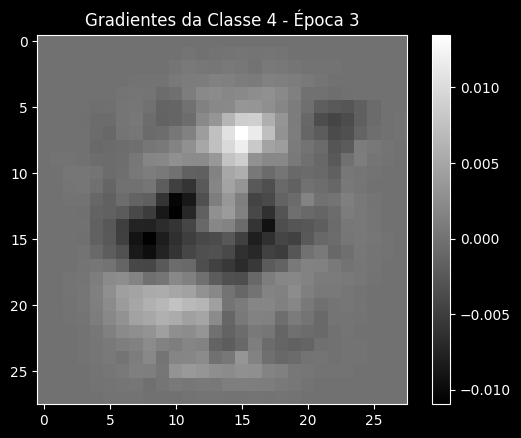

Época: 4, Perda: 0.6368, Acurácia: 0.8730


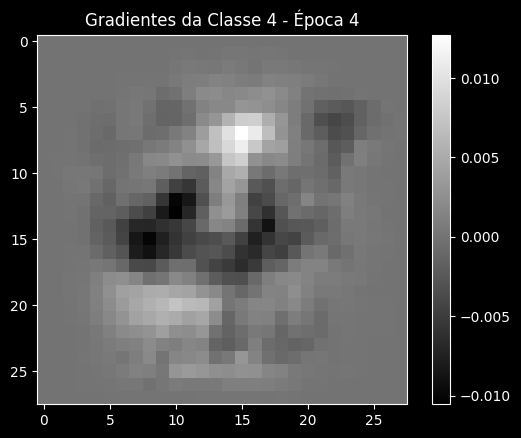

Época: 5, Perda: 0.6167, Acurácia: 0.8760


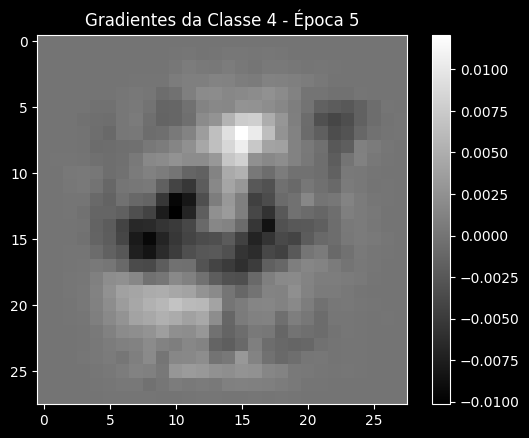

In [21]:
losses = []
zs = []

for epoch in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    zs.append(outputs[1].detach().numpy())

    # Calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # Zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data)
    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    # Imprime o número da época, a perda e a acurácia
    print(f"Época: {epoch + 1}, Perda: {loss.item():.4f}, Acurácia: {accuracy:.4f}")

    # Visualiza os gradientes referentes à classe do dígito 4
    gradients_class_4 = model.weight.grad[4].view(28, 28).detach().numpy()
    plt.imshow(gradients_class_4, cmap='gray')
    plt.title(f"Gradientes da Classe 4 - Época {epoch + 1}")
    plt.colorbar()
    plt.show()

<details>
<summary>Mostrar Resultado</summary>

```python
from IPython import display
import numpy
a = 5
losses = []
zs = []
fig = plt.figure(figsize=(18, 6))

try:
    for i in range(epochs):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # Predict da rede
        outputs = model(inputs)
        zs.append(outputs[1].detach().numpy())

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data)
        weights_d = model.weight.data[4].numpy().reshape(28,28)
        weights_g = model.weight.grad.data[4].numpy().reshape(28,28)
        ww = np.concatenate((weights_d,weights_g),1)
        plt.imshow(ww.reshape((28,28*2)),cmap = 'gray')
        display.display(fig)
        display.clear_output(wait=True)
        input(i)
        
        _, predicts = torch.max(outputs, 1)

        y_pred = predicts.data
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()
        print('Accuracy:', accuracy)
        print("epoca: " + str(i + 1))
        print("perda: " + str(loss.data.detach().numpy()))
except KeyboardInterrupt:
    pass
```

</details>



## Perguntas

1. Qual é o shape da matriz de entrada na rede?  
r = O shape da matriz de entrada na rede é `(n_samples_train, 784)`, onde `n_samples_train` é o número de amostras de treinamento (1000 neste caso) e `784` corresponde ao número de atributos de entrada (28x28 pixels de cada imagem achatados em um vetor).  

2. Qual é o shape da saída da rede?  
r = O shape da saída da rede é `(n_samples_train, 10)`, onde `n_samples_train` é o número de amostras de treinamento (1000 neste caso) e `10` corresponde ao número de neurônios na camada de saída, representando as 10 classes possíveis (dígitos de 0 a 9).  

3. Qual é o número total de parâmetros da rede, incluindo o bias?  
r = O número total de parâmetros da rede, incluindo o bias, pode ser calculado como:

- Pesos: \( 784 \times 10 = 7840 \) (28x28 entradas para cada um dos 10 neurônios de saída)
- Bias: \( 10 \) (um para cada neurônio de saída)

**Total:** \( 7840 + 10 = 7850 \) parâmetros.

# Aprendizados


1. **Regressão Softmax**:
    - A regressão softmax é uma técnica eficaz para problemas de classificação multiclasse, como a classificação de dígitos manuscritos no dataset MNIST.

2. **Pré-processamento de Dados**:
    - A normalização dos dados de entrada (divisão por 255) é essencial para melhorar a estabilidade e a eficiência do treinamento.
    - A redução do número de amostras pode ser útil para experimentos rápidos e para entender o comportamento do modelo.

3. **Visualização de Dados**:
    - Visualizar as imagens do dataset ajuda a compreender a natureza dos dados e a verificar se o carregamento foi realizado corretamente.
    - A visualização dos pesos treinados permite interpretar a importância de cada pixel para cada classe.

4. **Estrutura do Modelo**:
    - A rede linear utilizada possui 784 entradas (28x28 pixels) e 10 saídas (uma para cada classe), com um total de 7850 parâmetros (incluindo bias).
    - A simplicidade do modelo linear demonstra que mesmo arquiteturas simples podem alcançar bons resultados em problemas bem definidos.

5. **Treinamento do Modelo**:
    - O uso da função de perda `CrossEntropyLoss` é adequado para problemas de classificação multiclasse.
    - O otimizador SGD com uma taxa de aprendizado de 0.5 foi utilizado para ajustar os pesos do modelo.
    - A impressão da perda e da acurácia ao final de cada época permite monitorar o progresso do treinamento.

6. **Visualização de Gradientes**:
    - A análise dos gradientes durante o treinamento fornece insights sobre como os pesos estão sendo ajustados para cada classe.

7. **Avaliação do Modelo**:
    - A acurácia no conjunto de treinamento é uma métrica importante para avaliar o desempenho do modelo.
    - A matriz de confusão ajuda a identificar padrões de erros e classes que podem estar sendo confundidas.

8. **Interpretação dos Pesos**:
    - Os pesos treinados para cada classe podem ser visualizados como imagens, permitindo interpretar quais regiões das imagens são mais relevantes para cada classe.

9. **Limitações do Modelo**:
    - Apesar de ser eficaz, um modelo linear pode não capturar relações complexas nos dados, o que pode ser melhorado com redes neurais mais profundas.

10. **Ferramentas e Bibliotecas**:
     - O uso de bibliotecas como PyTorch e torchvision facilita a implementação, treinamento e visualização de modelos de aprendizado profundo.